## Feature Exploratory Data Analysis (EDA)

This notebook explores customer-level features generated in Phase 4.
The goal is to understand how customer behavior relates to churn and
to validate the engineered features used for modeling.


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
pd.set_option("display.max_columns", None)

print("Libraries loaded successfully")


Libraries loaded successfully


In [40]:
df = pd.read_csv("../data/processed/customer_features.csv")

print(f"Dataset Shape: {df.shape}")
df.head()


Dataset Shape: (3223, 31)


,customerid,frequency,total_transactions,monetary_value,avg_order_value,total_quantity,avg_quantity_per_txn,unique_products,unique_invoices,min_price,max_price,avg_price,price_std,country_count,first_purchase,last_purchase,recency_days,customer_tenure_days,days_since_first_purchase,days_since_last_purchase,avg_days_between_purchases,churn,recency_score,freq_score,monetary_score,rfm_total,recency_ratio,spending_momentum,freq_velocity,monetary_per_txn,quantity_velocity
0,12346.0,11,33,372.86,11.298788,70,2.121212,26,11,1.00,7.49,6.253333,1.682971,1,2009-12-14 08:34:00,2010-06-28 13:53:00,44,196,240,44,17.818182,1,3,4,2,9,2.338164,31.071667,0.055838,31.071667,0.355330
1,12349.0,2,47,1268.52,26.989787,474,10.085106,47,2,0.42,200.00,8.395319,29.108660,1,2010-04-29 13:20:00,2010-05-18 09:57:00,85,18,104,85,9.000000,0,2,2,3,7,8.500000,422.840000,0.105263,422.840000,24.947368
2,12355.0,1,22,488.21,22.191364,303,13.772727,22,1,0.42,9.95,2.399091,2.307094,1,2010-05-21 11:59:00,2010-05-21 11:59:00,82,0,82,82,0.000000,1,2,1,2,5,82.000000,244.105000,1.000000,244.105000,303.000000
3,12358.0,2,35,1697.93,48.512286,590,16.857143,34,2,0.65,10.75,3.442571,2.987152,1,2009-12-08 07:59:00,2010-06-07 12:28:00,65,181,246,65,90.500000,0,3,2,4,9,0.710383,565.976667,0.010989,565.976667,3.241758
4,12359.0,5,86,2012.03,23.395698,877,10.197674,82,5,0.34,49.95,5.170349,5.804231,1,2009-12-05 13:32:00,2010-06-22 10:24:00,50,198,249,50,39.600000,0,3,4,4,11,1.231527,335.338333,0.025126,335.338333,4.407035


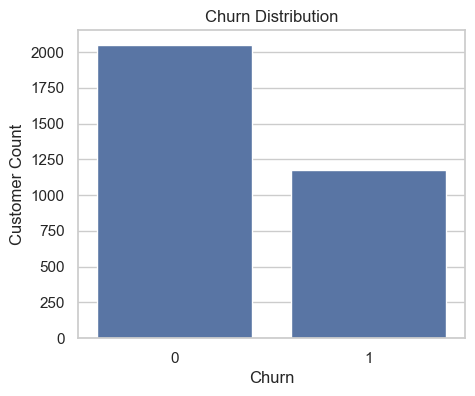

Churn Percentage:
churn
0    63.57
1    36.43
Name: proportion, dtype: float64


In [41]:
plt.figure(figsize=(5,4))
sns.countplot(x="churn", data=df)
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Customer Count")
plt.show()

print("Churn Percentage:")
print((df["churn"].value_counts(normalize=True) * 100).round(2))


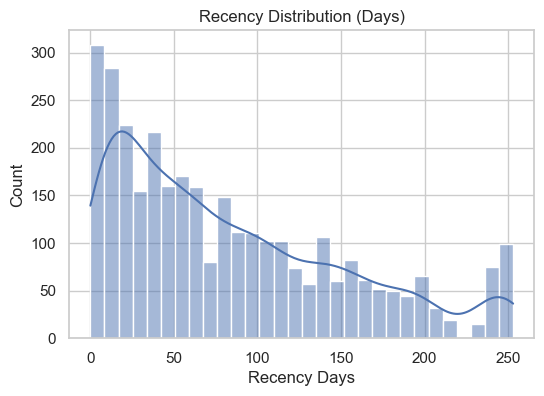

In [42]:
plt.figure(figsize=(6,4))
sns.histplot(df["recency_days"], bins=30, kde=True)
plt.title("Recency Distribution (Days)")
plt.xlabel("Recency Days")
plt.show()


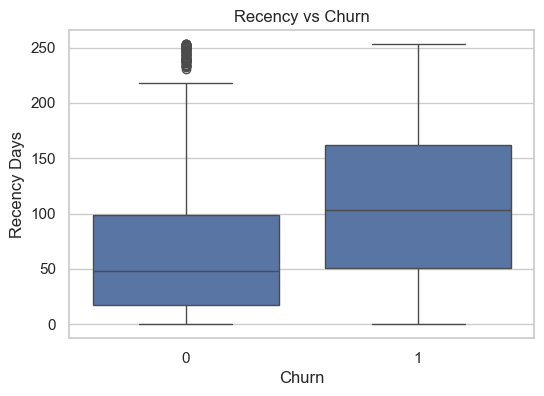

In [43]:
plt.figure(figsize=(6,4))
sns.boxplot(x="churn", y="recency_days", data=df)
plt.title("Recency vs Churn")
plt.xlabel("Churn")
plt.ylabel("Recency Days")
plt.show()


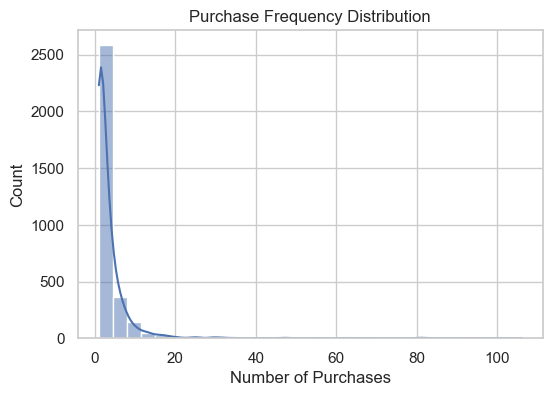

In [44]:
plt.figure(figsize=(6,4))
sns.histplot(df["frequency"], bins=30, kde=True)
plt.title("Purchase Frequency Distribution")
plt.xlabel("Number of Purchases")
plt.show()


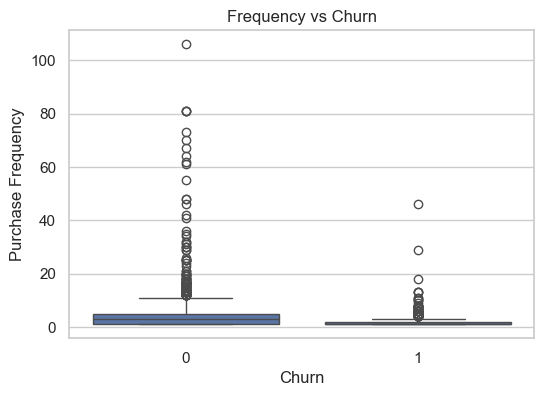

In [45]:
plt.figure(figsize=(6,4))
sns.boxplot(x="churn", y="frequency", data=df)
plt.title("Frequency vs Churn")
plt.xlabel("Churn")
plt.ylabel("Purchase Frequency")
plt.show()


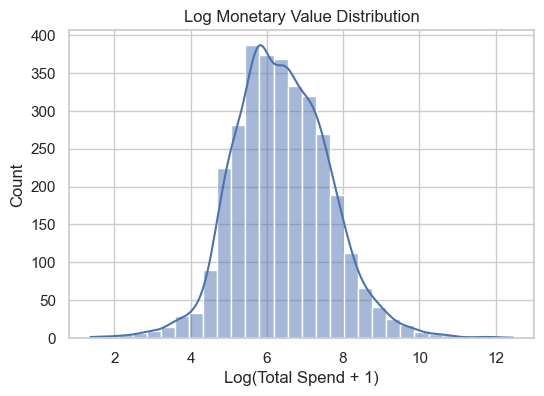

In [46]:
plt.figure(figsize=(6,4))
sns.histplot(np.log1p(df["monetary_value"]), bins=30, kde=True)
plt.title("Log Monetary Value Distribution")
plt.xlabel("Log(Total Spend + 1)")
plt.show()


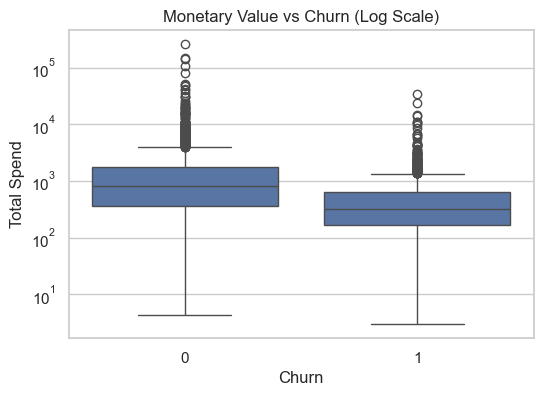

In [47]:
plt.figure(figsize=(6,4))
sns.boxplot(x="churn", y="monetary_value", data=df)
plt.yscale("log")
plt.title("Monetary Value vs Churn (Log Scale)")
plt.xlabel("Churn")
plt.ylabel("Total Spend")
plt.show()


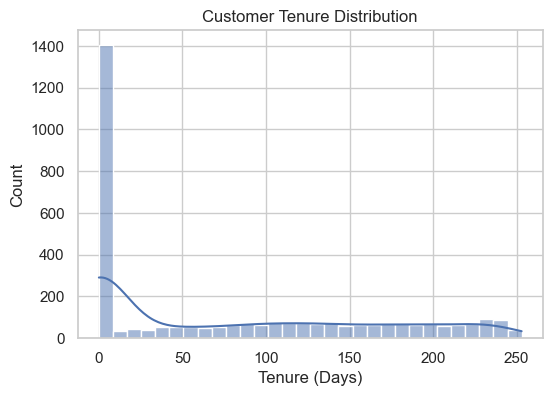

In [48]:
plt.figure(figsize=(6,4))
sns.histplot(df["customer_tenure_days"], bins=30, kde=True)
plt.title("Customer Tenure Distribution")
plt.xlabel("Tenure (Days)")
plt.show()


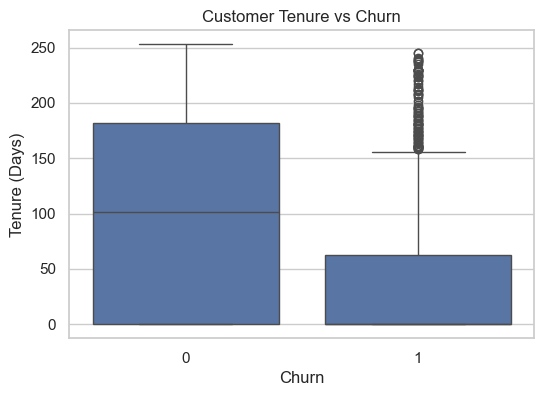

In [49]:
plt.figure(figsize=(6,4))
sns.boxplot(x="churn", y="customer_tenure_days", data=df)
plt.title("Customer Tenure vs Churn")
plt.xlabel("Churn")
plt.ylabel("Tenure (Days)")
plt.show()


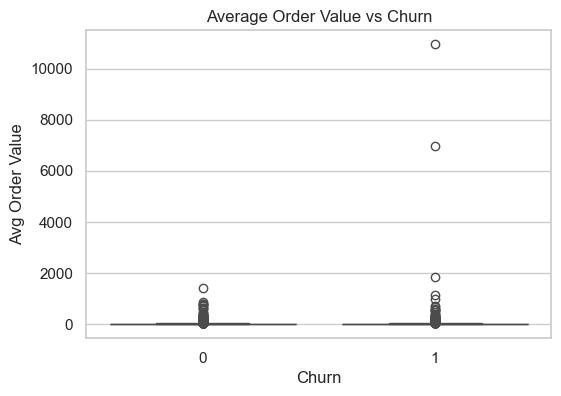

In [50]:
plt.figure(figsize=(6,4))
sns.boxplot(x="churn", y="avg_order_value", data=df)
plt.title("Average Order Value vs Churn")
plt.xlabel("Churn")
plt.ylabel("Avg Order Value")
plt.show()


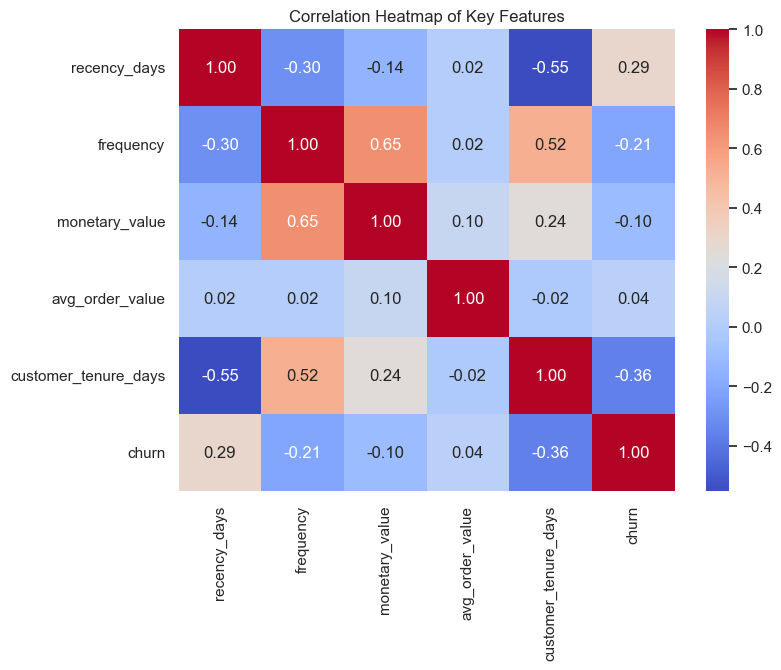

In [51]:
key_features = [
    "recency_days",
    "frequency",
    "monetary_value",
    "avg_order_value",
    "customer_tenure_days",
    "churn"
]

plt.figure(figsize=(8,6))
sns.heatmap(
    df[key_features].corr(),
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
plt.title("Correlation Heatmap of Key Features")
plt.show()


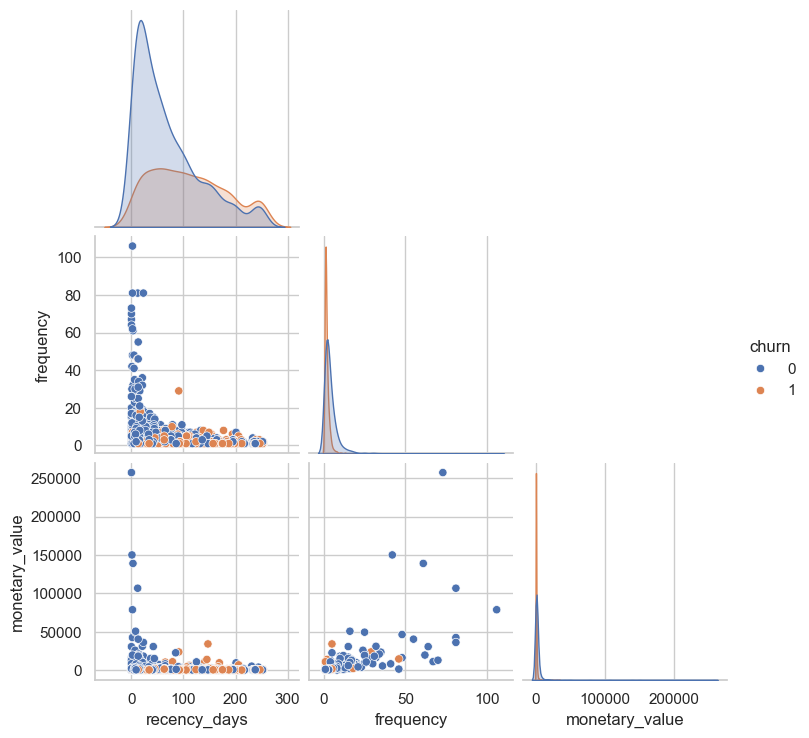

In [52]:
sns.pairplot(
    df[["recency_days", "frequency", "monetary_value", "churn"]],
    hue="churn",
    corner=True
)
plt.show()


In [53]:
df.groupby("churn")[key_features].mean().round(2)


,recency_days,frequency,monetary_value,avg_order_value,customer_tenure_days,churn
churn,,,,,,
0,68.21,4.39,2097.86,30.65,101.59,0.0
1,109.94,1.86,668.60,50.32,37.54,1.0


## Key Insights from Feature EDA

- Churned customers have higher recency values
- Higher purchase frequency and spending correlate with retention
- Long-tenured customers are less likely to churn
- RFM-based features show strong predictive signals

These findings validate the feature engineering approach and
support the strong performance observed during modeling.


In [54]:
# Create RFM Scores with a fix for overlapping values
# 1. Recency Score (Lower recency = Higher score)
df['recency_score'] = pd.qcut(df['recency_days'].rank(method='first'), 4, labels=[4, 3, 2, 1])

# 2. Frequency Score (Higher frequency = Higher score)
# Using rank(method='first') prevents the "Bin labels" ValueError
df['freq_score'] = pd.qcut(df['frequency'].rank(method='first'), 4, labels=[1, 2, 3, 4])

# 3. Monetary Score (Higher spend = Higher score)
df['monetary_score'] = pd.qcut(df['monetary_value'].rank(method='first'), 4, labels=[1, 2, 3, 4])

# 4. Calculate the combined RFM Total (Mandatory for Phase 4)
df['rfm_total'] = (df['recency_score'].astype(int) + 
                   df['freq_score'].astype(int) + 
                   df['monetary_score'].astype(int))

print("RFM Scores successfully created!")
print(f"New Feature count: {len(df.columns)}")
df[['customerid', 'frequency', 'freq_score', 'rfm_total']].head()

RFM Scores successfully created!
New Feature count: 31


,customerid,frequency,freq_score,rfm_total
0,12346.0,11,4,9
1,12349.0,2,2,7
2,12355.0,1,1,5
3,12358.0,2,2,9
4,12359.0,5,4,11


In [55]:
# Save the 26-feature dataset to overwrite the old one
df.to_csv('../data/processed/customer_features.csv', index=False)
print("Updated features saved to CSV.")

Updated features saved to CSV.
